In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
import seaborn as sns
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import pickle 

In [7]:
with open('/Users/natalipeeva/Documents/GitHub/Automatic-Answering-of-City-Council-Questions/data/results_ranking/questions_preprocessed.pickle', 'rb') as f:
    data = pickle.load(f)

EOFError: Ran out of input

In [ ]:
data

Dataset({
    features: ['Year', 'Month', 'Question', 'Answer', 'Document', 'URLs', 'Preprocessed_Question', 'Preprocessed_Answer', 'question_id', '__index_level_0__'],
    num_rows: 10960
})

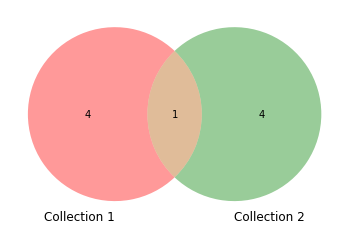

In [ ]:
import nltk
from nltk import ngrams
from matplotlib_venn import venn2

# Example texts for two collections
collection1 = "This is the first collection of texts."
collection2 = "This is the second collection of texts."

# Tokenize texts into n-grams
n = 4 # Change 'n' to the desired n-gram length
ngrams_collection1 = set(ngrams(nltk.word_tokenize(collection1.lower()), n))
ngrams_collection2 = set(ngrams(nltk.word_tokenize(collection2.lower()), n))

# Create Venn diagram
venn2([ngrams_collection1, ngrams_collection2], set_labels=('Collection 1', 'Collection 2'))

# Display the plot
plt.show()


In [9]:
df_all = pd.read_csv('/Users/natalipeeva/Documents/GitHub/Automatic-Answering-of-City-Council-Questions/data/question_answer/questions.csv')

In [10]:
df_all.head()

,Year,Month,Question,Answer,Document,URLs
0,2018,12,\n \n1. Heeft het college kennisgenomen van de...,\nNee.,https://amsterdam.raadsinformatie.nl/document/...,NaN
1,2018,12,\n \n2. Kan het college bevestigen of dit lesm...,"\nNee, het college heeft hier geen zicht op. ...",https://amsterdam.raadsinformatie.nl/document/...,NaN
2,2018,12,\n \n ...,\nHet CIDI is duidelijk over de eigen doelste...,https://amsterdam.raadsinformatie.nl/document/...,NaN
3,2018,12,\n \n4. Is het college bekend met de jaarlijks...,\nHet college heeft hier kennis van genomen.,https://amsterdam.raadsinformatie.nl/document/...,NaN
4,2018,12,\n \na. Is het college van oordeel dat het CID...,vraag 4a: \nHet college is voor een pluriform...,https://amsterdam.raadsinformatie.nl/document/...,NaN


### Question types
- **Factual**
- with links 
- without links


- **Opinion-seeking**
- with links 
- without links

#### Ideas:
- Unsupervised Learning, where first some words are provided - relevant to each class
https://towardsdatascience.com/unsupervised-text-classification-with-lbl2vec-6c5e040354de ;
https://github.com/sebischair/Lbl2Vec

**Frequent structures within factual questions**

In [8]:
import nltk

In [11]:
import nltk

sentence = "The quick brown fox jumps over the lazy dog. The lazy dog is not impressed."

def detect_ngarms_beginning(sentence, n):
    tokens = nltk.word_tokenize(str(sentence))

    #n = 3 # trigrams
    ngrams = list(nltk.ngrams(tokens, n))

    beginning_ngrams = []
    for gram in ngrams:
        if gram[0][0].isupper():
            beginning_ngrams.append(gram)
    #single_list = [item for sublist in beginning_ngrams for item in sublist]
    #freq_dist = nltk.FreqDist(beginning_ngrams)
    #top_ngrams = freq_dist.most_common(5)

    return beginning_ngrams


In [12]:
detect_ngarms_beginning(sentence,3)

[('The', 'quick', 'brown'), ('The', 'lazy', 'dog')]

In [14]:
questions = df_all['Question']

In [15]:
answers = df_all['Answer']

In [ ]:
q_ngrams = []
q_3grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 3))
    q_3grams.append(detect_ngarms_beginning(q, 3))

In [ ]:
q_4grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 4))
    q_4grams.append(detect_ngarms_beginning(q, 4))

In [ ]:
q_5grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 5))
    q_5grams.append(detect_ngarms_beginning(q, 5))

In [ ]:
q_6grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 6))
    q_6grams.append(detect_ngarms_beginning(q, 6))

In [ ]:
q_7grams = []
for q in questions: 
    q_ngrams.append(detect_ngarms_beginning(q, 7))
    q_7grams.append(detect_ngarms_beginning(q, 7))

### All ngrams - Questions

In [ ]:
single_list = [item for sublist in q_ngrams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

[(('Is', 'het', 'college'), 1864),
 (('Kan', 'het', 'college'), 1586),
 (('Zo', 'ja', ','), 1518),
 (('Zo', 'nee', ','), 1297),
 (('Zo', 'nee', ',', 'waarom'), 952),
 (('Zo', 'nee', ',', 'waarom', 'niet'), 896),
 (('Zo', 'nee', ',', 'waarom', 'niet', '?'), 865),
 (('Is', 'het', 'college', 'bereid'), 819),
 (('Is', 'het', 'college', 'het'), 679),
 (('Is', 'het', 'college', 'het', 'met'), 579),
 (('Kan', 'het', 'college', 'aangeven'), 502),
 (('Graag', 'een', 'toelichting'), 497),
 (('Is', 'het', 'college', 'het', 'met', 'de'), 480),
 (('Graag', 'een', 'toelichting', '.'), 470),
 (('Is', 'het', 'college', 'bereid', 'om'), 380),
 (('Klopt', 'het', 'dat'), 363),
 (('Is', 'het', 'college', 'het', 'met', 'de', 'fractie'), 324),
 (('Heeft', 'het', 'college'), 293),
 (('Wat', 'is', 'de'), 259),
 (('Zo', 'ja', ',', 'welke'), 231),
 (('Zo', 'ja', ',', 'hoe'), 227),
 (('Kan', 'het', 'college', 'het'), 195),
 (('Is', 'het', 'college', 'bereid', ','), 186),
 (('Kan', 'het', 'college', 'het', 'antwo

#### 3-grams:

In [ ]:
single_list = [item for sublist in q_3grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Is', 'het', 'college'), 1864),
 (('Kan', 'het', 'college'), 1586),
 (('Zo', 'ja', ','), 1518),
 (('Zo', 'nee', ','), 1297),
 (('Graag', 'een', 'toelichting'), 497),
 (('Klopt', 'het', 'dat'), 363),
 (('Heeft', 'het', 'college'), 293),
 (('Wat', 'is', 'de'), 259),
 (('Op', 'welke', 'manier'), 177),
 (('Wat', 'zijn', 'de'), 175),
 (('VVD', 'eens', 'dat'), 167),
 (('Ziet', 'het', 'college'), 161),
 (('Hoe', 'beoordeelt', 'het'), 127),
 (('Deelt', 'het', 'college'), 99),
 (('Vindt', 'het', 'college'), 98),
 (('In', 'hoeverre', 'is'), 95),
 (('Wat', 'is', 'het'), 95),
 (('Op', 'welke', 'wijze'), 90),
 (('Wil', 'het', 'college'), 84),
 (('FOOTNOTESTART', ':', 'https'), 78)]

#### 4-grams:

In [ ]:
single_list = [item for sublist in q_4grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Zo', 'nee', ',', 'waarom'), 952),
 (('Is', 'het', 'college', 'bereid'), 819),
 (('Is', 'het', 'college', 'het'), 679),
 (('Kan', 'het', 'college', 'aangeven'), 502),
 (('Graag', 'een', 'toelichting', '.'), 470),
 (('Zo', 'ja', ',', 'welke'), 231),
 (('Zo', 'ja', ',', 'hoe'), 227),
 (('Kan', 'het', 'college', 'het'), 195),
 (('Zo', 'ja', ',', 'wat'), 171),
 (('Kan', 'het', 'college', 'een'), 169),
 (('Klopt', 'het', 'dat', 'de'), 128),
 (('Hoe', 'beoordeelt', 'het', 'college'), 127),
 (('Zo', 'ja', ',', 'is'), 124),
 (('Zo', 'ja', ',', 'op'), 113),
 (('Zo', 'ja', ',', 'kan'), 111),
 (('Zo', 'nee', ',', 'is'), 99),
 (('Is', 'het', 'college', 'op'), 95),
 (('Zo', 'ja', ',', 'waarom'), 91),
 (('FOOTNOTESTART', ':', 'https', ':'), 78),
 (('Deelt', 'het', 'college', 'de'), 73)]

#### 5-grams

In [ ]:
single_list = [item for sublist in q_5grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Zo', 'nee', ',', 'waarom', 'niet'), 896),
 (('Is', 'het', 'college', 'het', 'met'), 579),
 (('Is', 'het', 'college', 'bereid', 'om'), 380),
 (('Is', 'het', 'college', 'bereid', ','), 186),
 (('Kan', 'het', 'college', 'het', 'antwoord'), 180),
 (('Zo', 'ja', ',', 'op', 'welke'), 100),
 (('Kan', 'het', 'college', 'aangeven', 'of'), 98),
 (('Zo', 'ja', ',', 'is', 'het'), 93),
 (('Is', 'het', 'college', 'op', 'de'), 92),
 (('Zo', 'ja', ',', 'kan', 'het'), 90),
 (('Kan', 'het', 'college', 'aangeven', 'wat'), 90),
 (('Zo', 'nee', ',', 'is', 'het'), 89),
 (('Zo', 'ja', ',', 'welke', '?'), 74),
 (('Kan', 'het', 'college', 'een', 'overzicht'), 73),
 (('Kan', 'het', 'college', 'aangeven', 'hoe'), 69),
 (('Is', 'het', 'college', 'het', 'eens'), 67),
 (('Zo', 'neen', ',', 'waarom', 'niet'), 64),
 (('Hoe', 'beoordeelt', 'het', 'college', 'de'), 63),
 (('Zo', 'ja', ',', 'wat', 'is'), 63),
 (('Partij', 'van', 'de', 'Ouderen', 'eens'), 59)]

#### 6-grams

In [ ]:
single_list = [item for sublist in q_6grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Zo', 'nee', ',', 'waarom', 'niet', '?'), 865),
 (('Is', 'het', 'college', 'het', 'met', 'de'), 480),
 (('Kan', 'het', 'college', 'het', 'antwoord', 'toelichten'), 178),
 (('Is', 'het', 'college', 'op', 'de', 'hoogte'), 92),
 (('Zo', 'ja', ',', 'kan', 'het', 'college'), 90),
 (('Zo', 'nee', ',', 'is', 'het', 'college'), 88),
 (('Zo', 'ja', ',', 'is', 'het', 'college'), 86),
 (('Is', 'het', 'college', 'het', 'eens', 'met'), 63),
 (('Zo', 'neen', ',', 'waarom', 'niet', '?'), 63),
 (('Kan', 'het', 'college', 'aangeven', 'wat', 'de'), 59),
 (('Kan', 'het', 'college', 'een', 'overzicht', 'geven'), 59),
 (('Partij', 'van', 'de', 'Ouderen', 'eens', 'dat'), 54),
 (('Is', 'het', 'college', 'bereid', 'om', 'in'), 51),
 (('Is', 'het', 'college', 'bereid', 'om', 'de'), 50),
 (('Zo', 'ja', ',', 'op', 'welke', 'manier'), 45),
 (('Welke', 'mogelijkheden', 'ziet', 'het', 'college', 'om'), 38),
 (('Indien', 'nee', ',', 'waarom', 'niet', '?'), 38),
 (('Is', 'het', 'college', 'bereid', ',', 'de'), 31)

#### 7-grams

In [ ]:
single_list = [item for sublist in q_7grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(20)

[(('Is', 'het', 'college', 'het', 'met', 'de', 'fractie'), 324),
 (('Kan', 'het', 'college', 'het', 'antwoord', 'toelichten', '?'), 177),
 (('Zo', 'nee', ',', 'waarom', 'niet', '?', 'Zo'), 99),
 (('Is', 'het', 'college', 'op', 'de', 'hoogte', 'van'), 86),
 (('Zo', 'nee', ',', 'is', 'het', 'college', 'bereid'), 64),
 (('Is', 'het', 'college', 'het', 'eens', 'met', 'de'), 55),
 (('Is', 'het', 'college', 'het', 'met', 'de', 'VVD'), 55),
 (('Zo', 'ja', ',', 'is', 'het', 'college', 'bereid'), 53),
 (('Kan', 'het', 'college', 'een', 'overzicht', 'geven', 'van'), 51),
 (('Is', 'het', 'college', 'het', 'met', 'de', 'SP'), 29),
 (('Zo', 'ja', ',', 'welke', '?', 'Zo', 'nee'), 29),
 (('Is', 'het', 'college', 'het', 'met', 'de', 'fracties'), 28),
 (('Zo', 'ja', ',', 'hoe', '?', 'Zo', 'nee'), 26),
 (('Zo', 'ja', ',', 'kan', 'het', 'college', 'aangeven'), 22),
 (('Zo', 'ja', ',', 'op', 'welke', 'manier', '?'), 22),
 (('Zo', 'ja', ',', 'hoe', 'gaat', 'het', 'college'), 21),
 (('Wat', 'is', 'de', 'rea

### All ngrams - Answers

In [16]:
a_ngrams = []
a_3grams = []
a_4grams = []
a_5grams = []
a_6grams = []
a_7grams = []

for a in answers: 
    a_ngrams.append(detect_ngarms_beginning(str(a), 3))
    a_ngrams.append(detect_ngarms_beginning(str(a), 4))
    a_ngrams.append(detect_ngarms_beginning(str(a), 5))
    a_ngrams.append(detect_ngarms_beginning(str(a), 6))
    a_ngrams.append(detect_ngarms_beginning(str(a), 7))
    
    a_3grams.append(detect_ngarms_beginning(str(a), 3))
    a_4grams.append(detect_ngarms_beginning(str(a), 4))
    a_5grams.append(detect_ngarms_beginning(str(a), 5))
    a_6grams.append(detect_ngarms_beginning(str(a), 6))
    a_7grams.append(detect_ngarms_beginning(str(a), 7))
    

In [17]:
single_list = [item for sublist in a_ngrams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

[(('Het', 'college', 'is'), 1042),
 (('Het', 'college', 'heeft'), 891),
 (('Een', 'routebeschrijving', 'vindt'), 800),
 (('Een', 'routebeschrijving', 'vindt', 'u'), 800),
 (('Een', 'routebeschrijving', 'vindt', 'u', 'op'), 800),
 (('Een', 'routebeschrijving', 'vindt', 'u', 'op', 'amsterdam.nl'), 800),
 (('Ja', ',', 'het'), 591),
 (('Ja', ',', 'het', 'college'), 493),
 (('Zie', 'het', 'antwoord'), 481),
 (('Op', 'dit', 'moment'), 453),
 (('Zie', 'het', 'antwoord', 'op'), 433),
 (('Zie', 'het', 'antwoord', 'op', 'vraag'), 400),
 (('De', 'gemeente', 'Amsterdam'), 392),
 (('De', 'gemeente', 'heeft'), 374),
 (('Op', 'basis', 'van'), 344),
 (('Wij', 'verwachten', 'u'), 342),
 (('Wij', 'verwachten', 'u', 'hiermee'), 341),
 (('Wij', 'verwachten', 'u', 'hiermee', 'voldoende'), 341),
 (('Wij', 'verwachten', 'u', 'hiermee', 'voldoende', 'te'), 341),
 (('Wij', 'verwachten', 'u', 'hiermee', 'voldoende', 'te', 'hebben'), 341),
 (('Het', 'college', 'vindt'), 281),
 (('Er', 'is', 'geen'), 277),
 (('He

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('dutch'))

preprocessed_texts = []
for text in questions:
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic characters
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    preprocessed_texts.extend(tokens)

# Counting
ngram_counts = Counter(ngrams(preprocessed_texts, n=1))  # Change n to desired n-gram length
most_common_ngrams = ngram_counts.most_common(10)  # Get the top 10 most common n-grams

# Convert tuples to strings
most_common_ngrams = [(str(ngram), count) for ngram, count in most_common_ngrams]

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_ngrams))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalipeeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natalipeeva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

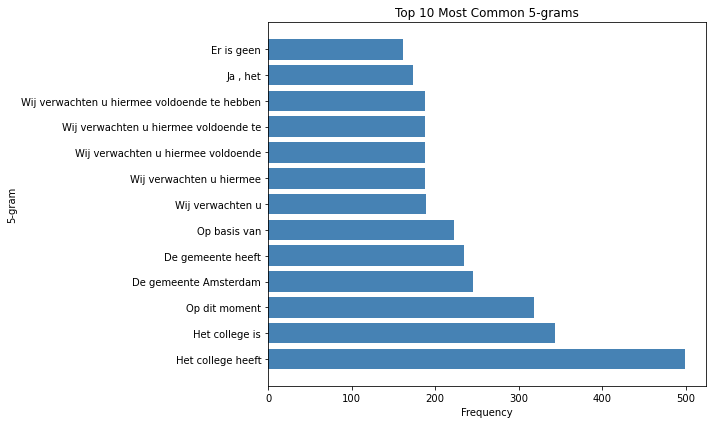

In [ ]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(13)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()

#### 3-grams

In [20]:
single_list = [item for sublist in a_3grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(15)

[(('Het', 'college', 'is'), 1042),
 (('Het', 'college', 'heeft'), 891),
 (('Een', 'routebeschrijving', 'vindt'), 800),
 (('Ja', ',', 'het'), 591),
 (('Zie', 'het', 'antwoord'), 481),
 (('Op', 'dit', 'moment'), 453),
 (('De', 'gemeente', 'Amsterdam'), 392),
 (('De', 'gemeente', 'heeft'), 374),
 (('Op', 'basis', 'van'), 344),
 (('Wij', 'verwachten', 'u'), 342),
 (('Het', 'college', 'vindt'), 281),
 (('Er', 'is', 'geen'), 277),
 (('Het', 'college', 'ziet'), 246),
 (('FOOTNOTESTART', ':', 'https'), 229),
 (('Naar', 'aanleiding', 'van'), 202)]

In [24]:
dict_freq = dict(freq_dist)

In [26]:
dict_freq

{('Nee', ',', 'het'): 163,
 ('De', 'gemeente', 'gaat'): 26,
 ('Het', 'CIDI', 'is'): 1,
 ('CIDI', 'is', 'duidelijk'): 1,
 ('Het', 'staat', 'het'): 1,
 ('CIDI', 'vrij', 'om'): 1,
 ('Het', 'is', 'aan'): 105,
 ('Het', 'college', 'heeft'): 891,
 ('Het', 'college', 'is'): 1042,
 ('Het', 'geluid', 'van'): 1,
 ('CIDI', 'is', 'één'): 1,
 ('Zie', 'de', 'beantwoording'): 133,
 ('Nee', '.', 'De'): 56,
 ('De', 'onderwijsinspectie', 'is'): 2,
 ('Het', 'college', 'gaat'): 113,
 ('Het', 'College', 'heeft'): 96,
 ('College', 'heeft', 'net'): 1,
 ('Pierik', 'in', 'de'): 1,
 ('Zorg', 'op', '16'): 1,
 ('Tevens', 'is', 'de'): 7,
 ('Ambulance', 'Amsterdam', 'door'): 1,
 ('Amsterdam', 'door', 'landelijke'): 1,
 ('Poorter', 'ingediende', 'actualiteit'): 1,
 ('Het', 'College', 'herkent'): 8,
 ('College', 'herkent', 'dus'): 1,
 ('Schriftelijke', 'vragen', '('): 2,
 ('SP', ')', 'over'): 1,
 ('Ambulance', 'Amsterdam', '('): 7,
 ('Amsterdam', '(', 'schriftelijke'): 1,
 ('Het', 'behoort', 'niet'): 1,
 ('College', '

In [38]:
dict_freq[('Dit', 'gebeurt', 'in')]

18

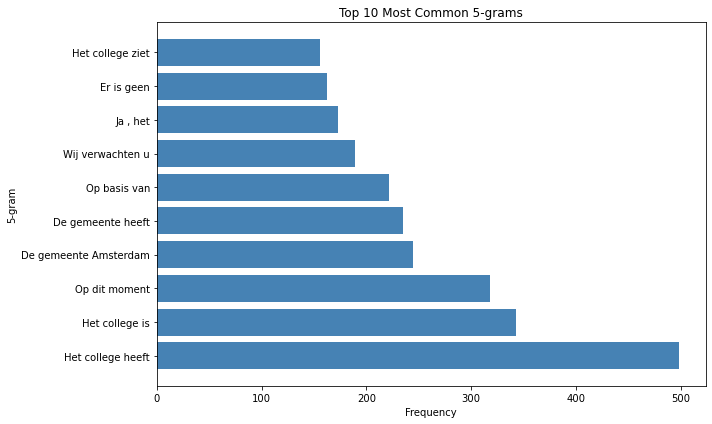

In [ ]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(10)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


#### 4-grams

In [ ]:
single_list = [item for sublist in a_4grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Wij', 'verwachten', 'u', 'hiermee'), 188),
 (('Ja', ',', 'het', 'college'), 126),
 (('Toelichting', 'door', 'vragensteller', ':'), 113),
 (('FOOTNOTESTART', ':', 'https', ':'), 109),
 (('Op', 'basis', 'van', 'de'), 108),
 (('In', 'het', 'kader', 'van'), 104),
 (('Het', 'college', 'is', 'het'), 89),
 (('Zie', 'het', 'antwoord', 'op'), 87),
 (('Het', 'college', 'heeft', 'geen'), 86),
 (('De', 'gemeente', 'Amsterdam', 'heeft'), 68)]

#### 5-grams

In [ ]:
single_list = [item for sublist in a_5grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Wij', 'verwachten', 'u', 'hiermee', 'voldoende'), 188),
 (('Zie', 'het', 'antwoord', 'op', 'vraag'), 82),
 (('Ja', ',', 'het', 'college', 'is'), 62),
 (('Zie', 'ook', 'het', 'antwoord', 'op'), 57),
 (('Er', 'is', 'geen', 'sprake', 'van'), 52),
 (('In', 'het', 'kader', 'van', 'de'), 45),
 (('Het', 'college', 'is', 'het', 'met'), 37),
 (('In', 'het', 'kader', 'van', 'het'), 30),
 (('Toelichting', 'door', 'vragensteller', ':', 'In'), 27),
 (('De', 'verwachting', 'is', 'dat', 'de'), 22)]

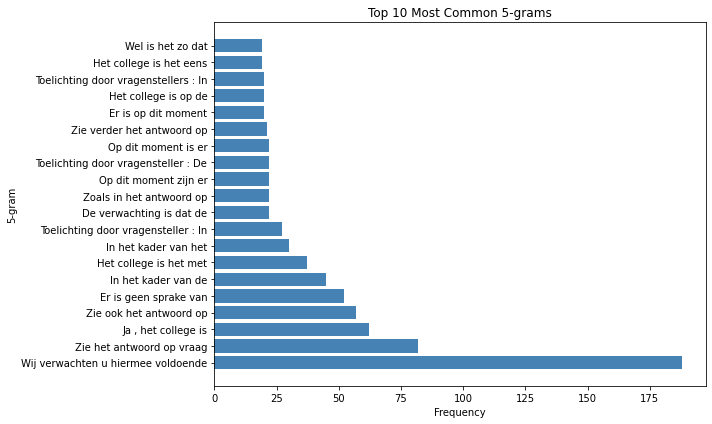

In [ ]:
import matplotlib.pyplot as plt

# Extract the 5-grams and their frequencies
top_10 = freq_dist.most_common(20)
ngrams = [ngram for ngram, count in top_10]
frequencies = [count for ngram, count in top_10]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(ngrams)), frequencies, color='steelblue')
plt.yticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], fontsize=10)
plt.xlabel('Frequency')
plt.ylabel('5-gram')
plt.title('Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


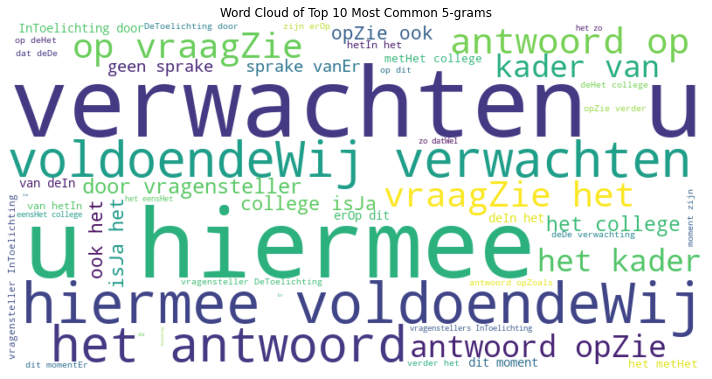

In [ ]:
from wordcloud import WordCloud

# Create a string representation of the 5-grams and their frequencies
text = ' '.join([' '.join(ngram) * count for ngram, count in top_10])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Most Common 5-grams')
plt.tight_layout()
plt.show()


#### 6-grams

In [ ]:
single_list = [item for sublist in a_6grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Wij', 'verwachten', 'u', 'hiermee', 'voldoende', 'te'), 188),
 (('Zie', 'ook', 'het', 'antwoord', 'op', 'vraag'), 57),
 (('Het', 'college', 'is', 'het', 'met', 'de'), 30),
 (('Er', 'is', 'geen', 'sprake', 'van', 'een'), 27),
 (('Zoals', 'in', 'het', 'antwoord', 'op', 'vraag'), 21),
 (('Zie', 'het', 'antwoord', 'op', 'vraag', '3'), 21),
 (('Zie', 'verder', 'het', 'antwoord', 'op', 'vraag'), 21),
 (('Het', 'college', 'is', 'op', 'de', 'hoogte'), 20),
 (('Zie', 'het', 'antwoord', 'op', 'vraag', '1'), 20),
 (('Ja', ',', 'het', 'college', 'is', 'het'), 19)]

#### 7-grams

In [ ]:
single_list = [item for sublist in a_7grams for item in sublist]
freq_dist = nltk.FreqDist(single_list)
freq_dist.most_common(10)

[(('Wij', 'verwachten', 'u', 'hiermee', 'voldoende', 'te', 'hebben'), 188),
 (('Zie', 'het', 'antwoord', 'op', 'vraag', '3', '.'), 18),
 (('Het', 'college', 'is', 'op', 'de', 'hoogte', 'van'), 18),
 (('Zie', 'het', 'antwoord', 'op', 'vraag', '1', '.'), 14),
 (('Zie', 'ook', 'het', 'antwoord', 'op', 'vraag', '2'), 13),
 (('Ja', ',', 'het', 'college', 'is', 'op', 'de'), 13),
 (('Zie', 'het', 'antwoord', 'op', 'vraag', '2', '.'), 12),
 (('Het', 'college', 'is', 'het', 'eens', 'met', 'de'), 12),
 (('Zie', 'ook', 'het', 'antwoord', 'op', 'vraag', '1'), 11),
 (('Zoals', 'bij', 'de', 'beantwoording', 'van', 'vraag', '1'), 10)]

### URL Q&A

In [ ]:
df_trans_links = pd.read_csv('Questions_links_translations.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Questions_links_translations.csv'

In [ ]:
questions = df_trans_links['Question']
answers = df_trans_links['Answer']

In [ ]:
q_ngrams_ = []
q_3grams_ = []
q_4grams_ = []
q_5grams_ = []
q_6grams_ = []
q_7grams_ = []

for q in questions: 
    q_ngrams_.append(detect_ngarms_beginning(str(q), 3))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 4))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 5))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 6))
    q_ngrams_.append(detect_ngarms_beginning(str(q), 7))
    
    q_3grams_.append(detect_ngarms_beginning(str(q), 3))
    q_4grams_.append(detect_ngarms_beginning(str(q), 4))
    q_5grams_.append(detect_ngarms_beginning(str(q), 5))
    q_6grams_.append(detect_ngarms_beginning(str(q), 6))
    q_7grams_.append(detect_ngarms_beginning(str(q), 7))
    

In [ ]:
single_list = [item for sublist in q_ngrams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(45)
top_ngrams

In [ ]:
single_list = [item for sublist in q_4grams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(15)
top_ngrams

In [ ]:
single_list = [item for sublist in q_5grams_ for item in sublist]
freq_dist = nltk.FreqDist(single_list)
top_ngrams = freq_dist.most_common(15)
top_ngrams